
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0.0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

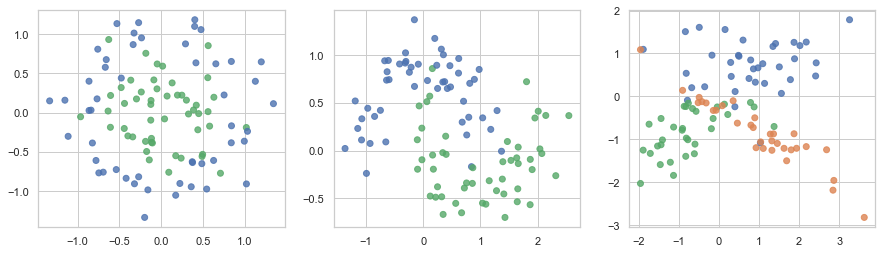

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

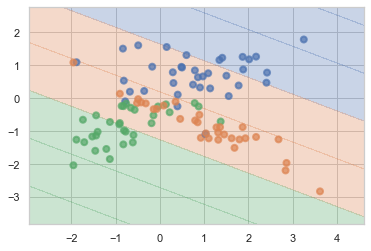

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Accuracy test: 0.8000
Accuracy train: 1.0000


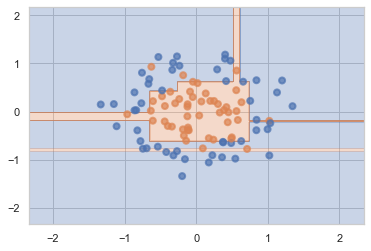

Accuracy test: 0.9500
Accuracy train: 1.0000


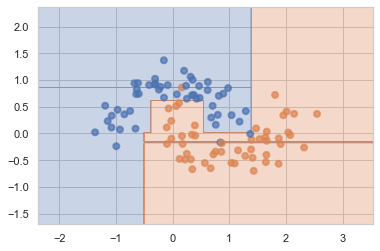

Accuracy test: 0.7500
Accuracy train: 1.0000


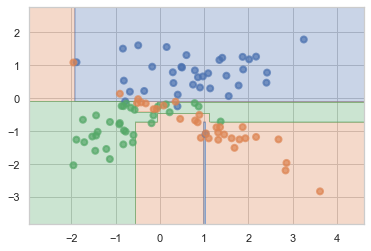

In [18]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
from sklearn.metrics import accuracy_score


for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)
    print(f'Accuracy test: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Accuracy train: {accuracy_score(y_train, tree.predict(X_train)):.4f}')

    plot_surface(tree, X, y)
    plt.show()


__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Переобучились довольно сильно


__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset №0
Max depth: 1
Min samples leaf: 1
Accuracy test: 0.55
Accuracy train: 0.65


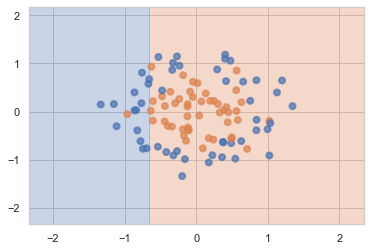

Dataset №0
Max depth: 1
Min samples leaf: 8
Accuracy test: 0.55
Accuracy train: 0.65


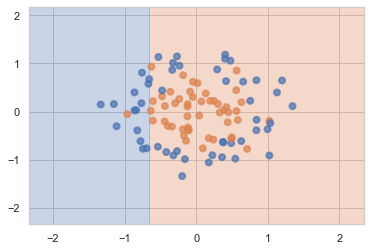

Dataset №0
Max depth: 1
Min samples leaf: 15
Accuracy test: 0.5
Accuracy train: 0.65


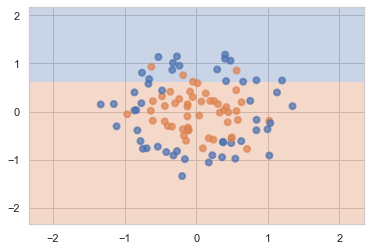

Dataset №0
Max depth: 8
Min samples leaf: 1
Accuracy test: 0.7
Accuracy train: 1.0


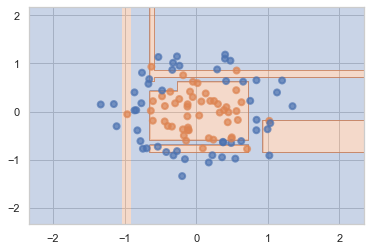

Dataset №0
Max depth: 8
Min samples leaf: 8
Accuracy test: 0.95
Accuracy train: 0.875


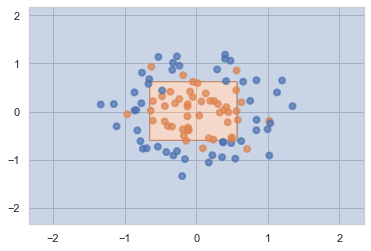

Dataset №0
Max depth: 8
Min samples leaf: 15
Accuracy test: 0.8
Accuracy train: 0.775


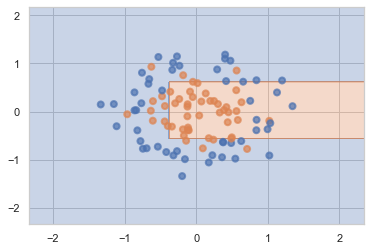

Dataset №0
Max depth: 15
Min samples leaf: 1
Accuracy test: 0.7
Accuracy train: 1.0


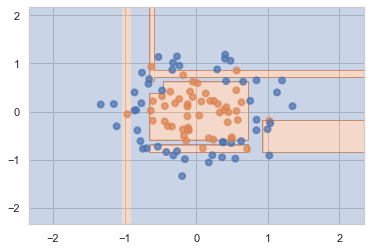

Dataset №0
Max depth: 15
Min samples leaf: 8
Accuracy test: 0.95
Accuracy train: 0.875


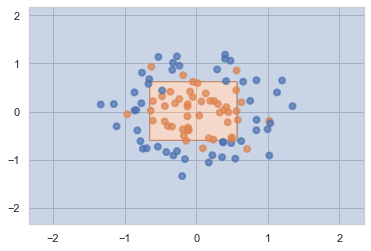

Dataset №0
Max depth: 15
Min samples leaf: 15
Accuracy test: 0.8
Accuracy train: 0.775


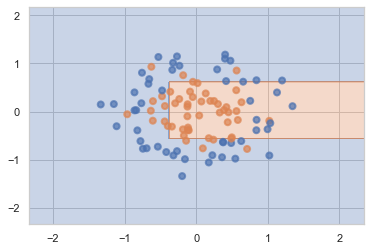

Dataset №1
Max depth: 1
Min samples leaf: 1
Accuracy test: 0.7
Accuracy train: 0.8625


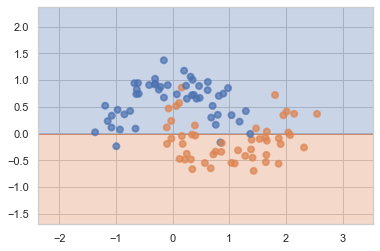

Dataset №1
Max depth: 1
Min samples leaf: 8
Accuracy test: 0.7
Accuracy train: 0.8625


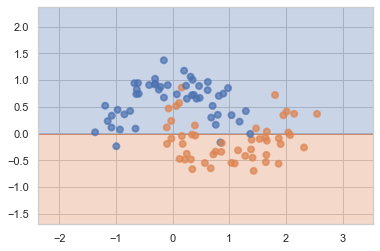

Dataset №1
Max depth: 1
Min samples leaf: 15
Accuracy test: 0.7
Accuracy train: 0.8625


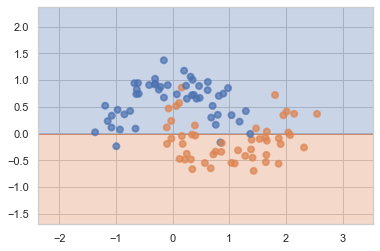

Dataset №1
Max depth: 8
Min samples leaf: 1
Accuracy test: 0.75
Accuracy train: 1.0


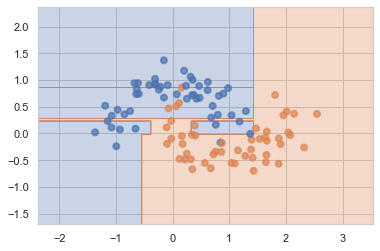

Dataset №1
Max depth: 8
Min samples leaf: 8
Accuracy test: 0.75
Accuracy train: 0.9375


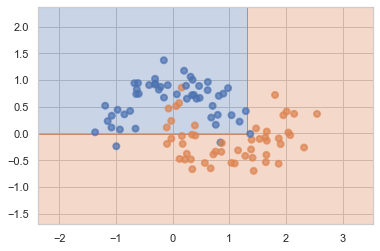

Dataset №1
Max depth: 8
Min samples leaf: 15
Accuracy test: 0.7
Accuracy train: 0.8625


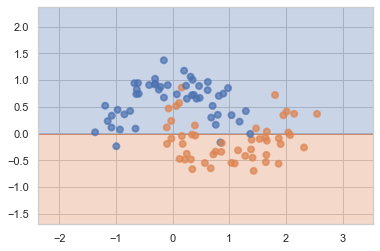

Dataset №1
Max depth: 15
Min samples leaf: 1
Accuracy test: 0.75
Accuracy train: 1.0


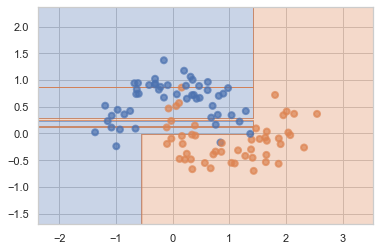

Dataset №1
Max depth: 15
Min samples leaf: 8
Accuracy test: 0.75
Accuracy train: 0.9375


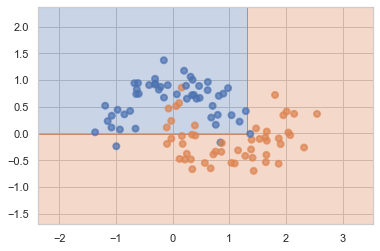

Dataset №1
Max depth: 15
Min samples leaf: 15
Accuracy test: 0.7
Accuracy train: 0.8625


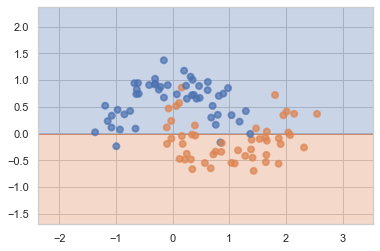

Dataset №2
Max depth: 1
Min samples leaf: 1
Accuracy test: 0.5
Accuracy train: 0.6625


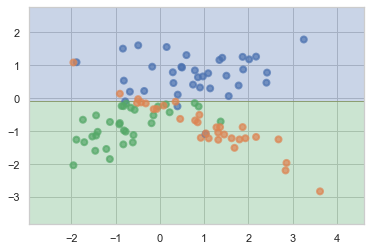

Dataset №2
Max depth: 1
Min samples leaf: 8
Accuracy test: 0.5
Accuracy train: 0.6625


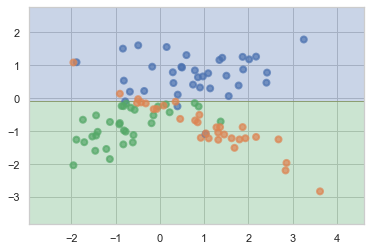

Dataset №2
Max depth: 1
Min samples leaf: 15
Accuracy test: 0.5
Accuracy train: 0.6625


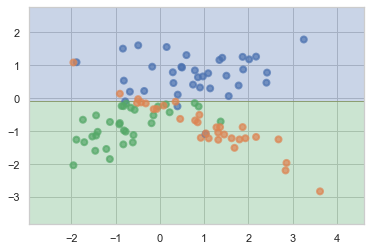

Dataset №2
Max depth: 8
Min samples leaf: 1
Accuracy test: 0.75
Accuracy train: 0.9875


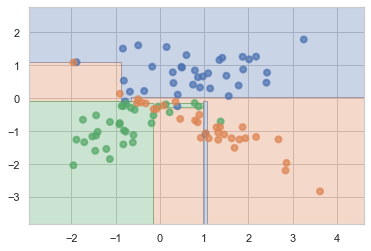

Dataset №2
Max depth: 8
Min samples leaf: 8
Accuracy test: 0.8
Accuracy train: 0.8875


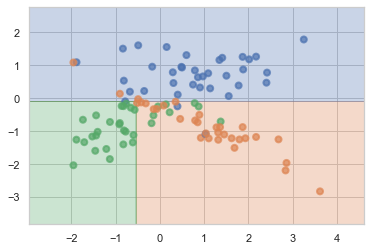

Dataset №2
Max depth: 8
Min samples leaf: 15
Accuracy test: 0.8
Accuracy train: 0.8875


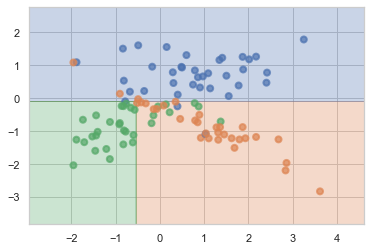

Dataset №2
Max depth: 15
Min samples leaf: 1
Accuracy test: 0.75
Accuracy train: 1.0


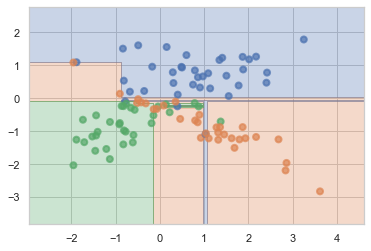

Dataset №2
Max depth: 15
Min samples leaf: 8
Accuracy test: 0.8
Accuracy train: 0.8875


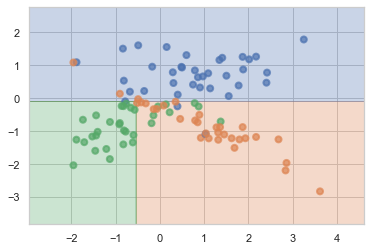

Dataset №2
Max depth: 15
Min samples leaf: 15
Accuracy test: 0.8
Accuracy train: 0.8875


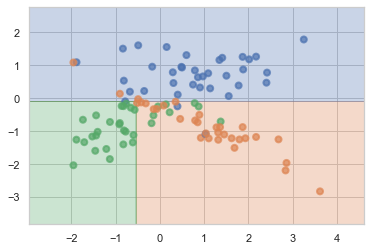

In [24]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

dataset = 0
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for i in range(1, 20, 7):
        for j in range(1, 20, 7):
            print(f'Dataset №{dataset}')
            print(f'Max depth: {i}')
            print(f'Min samples leaf: {j}')

            dec_tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
            dec_tree.fit(X_train, y_train)

            y_pred_test = dec_tree.predict(X_test)
            y_pred_train = dec_tree.predict(X_train)

            print(f'Accuracy test: {accuracy_score(y_test, y_pred_test)}')
            print(f'Accuracy train: {accuracy_score(y_train, y_pred_train)}')

            plot_surface(dec_tree, X, y)
            plt.show()
    dataset += 1

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Если max depth и min samples leaf довольно большие, то результаты хорошие.

Переобучение происходит если min samples leaf маленькое.

Если маленькое max depth, то модель обучается плохо.



# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [2]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
STG
SCG
STR
LPR
PEG


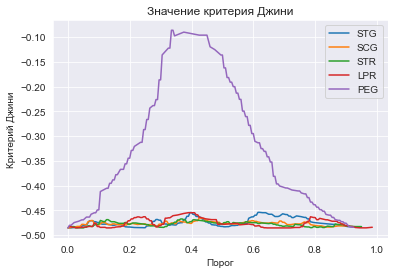

In [3]:
from tree_code import find_best_split

for feature in df.drop(columns=df.columns[-1]):
    print(feature)
    thresholds, ginis, best_threshold, best_gini = find_best_split(df[feature].values, df["UNS"].values)
    plt.plot(thresholds, ginis, label=feature)

plt.xlabel("Порог")
plt.ylabel("Критерий Джини")
plt.title("Значение критерия Джини")
plt.legend()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

По признаку PEG. Да, совпадает. Сразу можно увидеть границу, по которой можно разделить на два класса признаки. Отличаются тем, что иначе такую границу провести нельзя.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




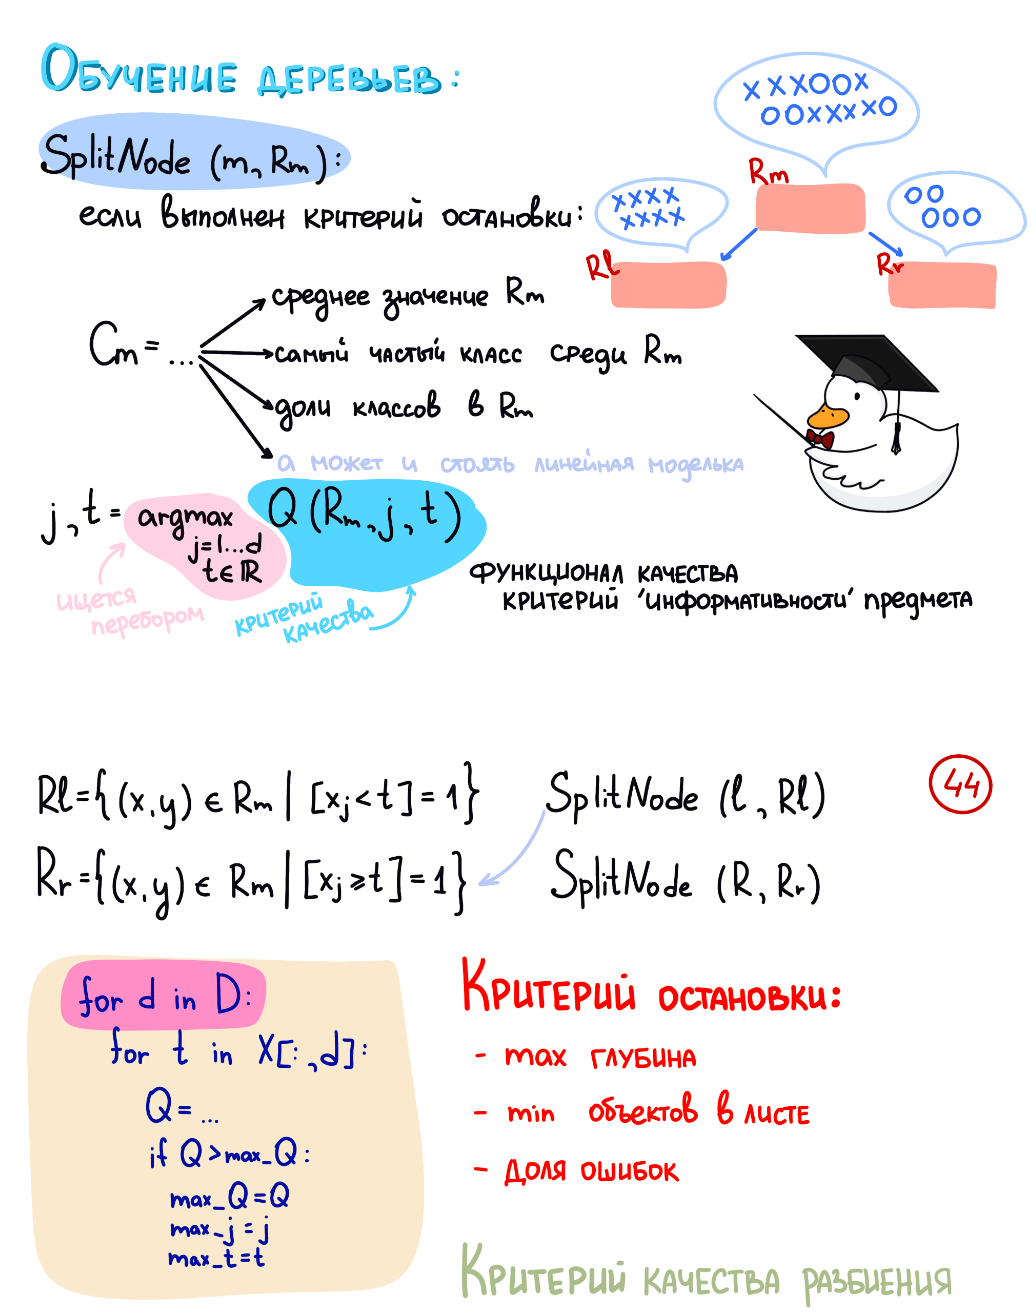

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [4]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('agaricus-lepiota.data', delimiter=',')
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [5]:
from tree_code import DecisionTree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y = df['p']
X = df.drop(['p'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
feature_types = ['real'] * X_train.shape[1]

model = DecisionTree(feature_types)
model.fit(X_train.to_numpy(), y_train.to_numpy())

predictions = model.predict(X_test.to_numpy())
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 1.0


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [6]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

d_1 = df.copy()

d_2 = pd.read_csv('tic-tac-toe-endgame.csv')
d_2['V10'] = d_2['V10'].apply(lambda x: 1 if x == 'positive' else 0)

d_3 = pd.read_csv('car.data')
d_3['unacc'] = d_3['unacc'].apply(lambda x: 0 if (x == 'unacc') | (x == 'acc') else 1)

d_4 = pd.read_csv('nursery.data')
d_4['recommend'] = d_4['recommend'].apply(lambda x: 0 if (x == 'not_recom') | (x == 'recommend') else 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

target_dict = {
    'agaricus-lepiota':'p',
    'tic-tac-toe-endgam':'V10',
    'car':'unacc',
    'nursery':'recommend'
}
data_dict = {
    'agaricus-lepiota': d_1,
    'tic-tac-toe-endgam': d_2,
    'car': d_3,
    'nursery': d_4
}
result = {}

for data in data_dict:
    df = data_dict[data].copy()
    target = target_dict[data]

    y = df[target]
    X = df.drop(target, axis=1)

    label_encoder = LabelEncoder()

    for column in X.columns:
        if X[column].dtype != 'object':
            continue
        X[column] = label_encoder.fit_transform(X[column])

    # вещественные
    feature_types = ['real'] * X.shape[1]
    m_1 = DecisionTree(feature_types)
    accuracy_1 = np.mean(
        cross_val_score(
            m_1,
            X.to_numpy(),
            y.to_numpy(),
            scoring=make_scorer(accuracy_score),
            cv = StratifiedKFold(10, shuffle=True, random_state=777)
        )
    )


    # категориальные
    feature_types = np.array(['categorical'] * X.shape[1])
    m_2 = DecisionTree(feature_types)
    accuracy_2 = np.mean(
        cross_val_score(
            m_2,
            X.to_numpy(),
            y.to_numpy(),
            scoring=make_scorer(accuracy_score),
            cv = StratifiedKFold(10, shuffle=True, random_state=777)
        )
    )

    # вещественные + oneHotEncoding
    ohe = OneHotEncoder(sparse=False)
    X_ohe = ohe.fit_transform(X)
    columns_ohe = ohe.get_feature_names_out(X.columns)

    df_ohe = pd.DataFrame(X_ohe, columns=columns_ohe)
    feature_types = np.array(['real'] * df_ohe.shape[1])
    m_3 = DecisionTree(feature_types)
    accuracy_3 = np.mean(
        cross_val_score(
            m_3,
            df_ohe.to_numpy(),
            y.to_numpy(),
            scoring=make_scorer(accuracy_score),
            cv = StratifiedKFold(10, shuffle=True, random_state=777)
        )
    )

    # sklearn
    m_4 = DecisionTreeClassifier()
    accuracy_4 = np.mean(
        cross_val_score(
            m_4,
            X.to_numpy(),
            y.to_numpy(),
            scoring=make_scorer(accuracy_score),
            cv = StratifiedKFold(10, shuffle=True, random_state=777)
        )
    )

    result[data] = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]

df_result = pd.DataFrame(result, index=[
    "вещественные",
    "категориальные",
    "вещественные + OHE",
    "sklearn"
])
df_result



,agaricus-lepiota,tic-tac-toe-endgam,car,nursery
вещественные,1.0,NaN,0.994206,0.999769
категориальные,1.0,NaN,0.993628,0.999846
вещественные + OHE,1.0,NaN,0.989572,0.999846
sklearn,1.0,0.86534,0.993628,0.999769


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Первый датасет: Все алгоритмы показали accuracy = 1, что говорит о простоте задачи. Второй датасет как-то отработал слабо, даже sklearn показал так себе результат (самый плохой из всех, что есть). Третий датасет получился чуть хуже, чем четвертый, но в целом все приближено к 1. Алгоритмы ранжируются по разному из-за разной природы данных. Да, случайная компонента присутствует в некоторых результатах алгоритмов.


# Как дела?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ